In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [8]:
#Clean the Runs column
df['Runs']= df['Runs'].apply(lambda x: int(x[:-1]) if x[-1]=="*" else int(x))

In [9]:
#Use the describe function
df['Runs'].describe(percentiles = [0.25,0.5,1]) 

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

In [10]:
32.5-10

22.5

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


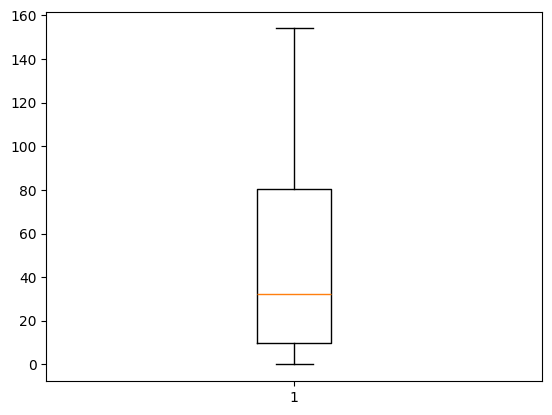

In [11]:
plt.boxplot(df.Runs)
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [12]:
#Extract the year from the Start Date column
df['Start Date']= df['Start Date'].apply(lambda x: (x[-2:]))

In [13]:
#For verifying statement 1
df['Start Date'].value_counts()

Start Date
11    31
13    23
14    17
10    16
12    11
15    10
16    10
09     6
08     5
17     3
Name: count, dtype: int64

In [14]:
#For verifying statement 2
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)

C:\Users\TusharSharma\AppData\Local\Temp\ipykernel_3020\3975367852.py:2: FutureWarning: The provided callable <function mean at 0x00000238C3E05D00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)


Start Date,08,09,10,11,12,13,14,15,16,17
Runs,31.8,38.333333,45.375,42.0,40.363636,47.826087,58.529412,30.4,73.9,61.666667


In [16]:
#For verifying statement 3
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

C:\Users\TusharSharma\AppData\Local\Temp\ipykernel_3020\955780535.py:2: FutureWarning: The provided callable <function max at 0x00000238C3E05300> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)


Start Date,08,09,10,11,12,13,14,15,16,17
Runs,54,107,118,117,128,115,139,138,154,122


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

D - [1, 14.4)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)D - [1, 14.4)


In [17]:
#Clean the Mins column
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

C:\Users\TusharSharma\AppData\Local\Temp\ipykernel_3020\1310775946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Mins'] = df2['Mins'].apply(lambda x: int(x))


(array([28., 13., 12.,  9.,  6.,  6.,  9.,  4.,  9., 11.,  4.,  6.,  3.,
         2.,  4.]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. , 148.4, 161.8, 175.2, 188.6, 202. ]),
 <BarContainer object of 15 artists>)

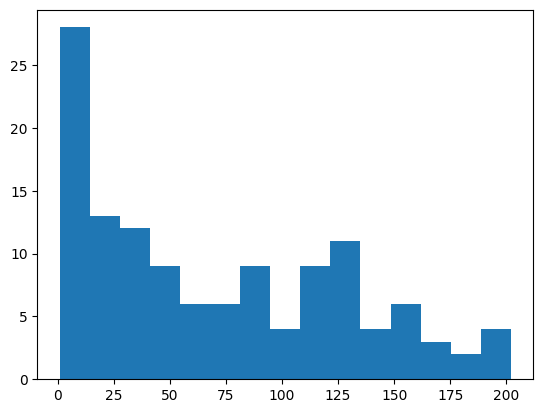

In [18]:
#Plotting the histogram
plt.hist(df2.Mins, bins = 15)

Clearly **D[1, 14.4)** has the highest frequency